In [ ]:
# Just one thing or another
# Make some data

import sklearn
from sklearn.datasets import make_circles


n_samples = 1000

# Circles

X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [ ]:
print(f'First 5 samples of X:\n {X[:5]}')
print(f'First 5 samples of y:\n {y[:5]}')

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
# Make DataFrame
import pandas as pd

circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})


# circles = pd.DataFrame({'X1': X[:, 0][:5],
#                         'X2': X[:, 1][:5],
#                         'label': y[:5]})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


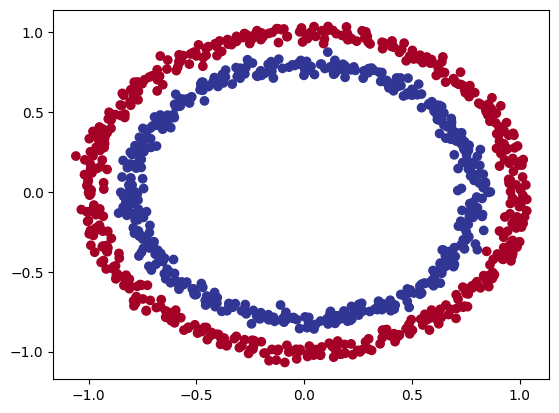

In [ ]:
# 3x Visualise
import matplotlib.pyplot as plt



plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);


# plt.scatter(x=X[:, 0][:15],
#             y=X[:, 1][:15],
#             c=y[:15],
#             cmap=plt.cm.RdYlBu);


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# First example o features and labels

X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')



Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
# Turn data into tensors

import torch
torch.__version__

'2.0.0+cu118'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

In [ ]:
## Building a model

import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# 9:28:39

In [ ]:
class ClassificationModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=2)
    self.layer_3 = nn.Linear(in_features=2, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_0 = ClassificationModel()
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1186, -0.5260],
                      [ 0.2649, -0.5904],
                      [ 0.1423, -0.4912],
                      [ 0.2476,  0.2820],
                      [ 0.5814,  0.3499]])),
             ('layer_1.bias',
              tensor([ 0.6783, -0.3367,  0.6281, -0.1232, -0.1392])),
             ('layer_2.weight',
              tensor([[-0.2362,  0.2877,  0.4143, -0.2481,  0.3944],
                      [ 0.3219,  0.0422, -0.2941,  0.3897,  0.3801]])),
             ('layer_2.bias', tensor([-0.1727, -0.1736])),
             ('layer_3.weight', tensor([[-0.1717, -0.1069]])),
             ('layer_3.bias', tensor([-0.2974]))])

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.ReLU(),
    nn.Linear(in_features=5, out_features=2),
    nn.ReLU(),
    nn.Linear(in_features=2, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6154,  0.5286],
                      [ 0.5277, -0.4153],
                      [ 0.6752,  0.3918],
                      [ 0.3040,  0.2714],
                      [-0.0790,  0.0773]])),
             ('0.bias', tensor([-0.1468, -0.4980,  0.2405, -0.2839, -0.0382])),
             ('2.weight',
              tensor([[ 0.1994,  0.3758, -0.2496, -0.2479, -0.4288],
                      [ 0.1222,  0.1506,  0.3004, -0.3970, -0.4177]])),
             ('2.bias', tensor([0.2100, 0.4235])),
             ('4.weight', tensor([[-0.2195, -0.3185]])),
             ('4.bias', tensor([-0.0979]))])

In [ ]:
# 9:49:55

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nFirst 10 labels:\n{y_test[:10]}')

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.2793],
        [-0.3272],
        [-0.2789],
        [-0.2985],
        [-0.2910],
        [-0.3065],
        [-0.3539],
        [-0.3536],
        [-0.2789],
        [-0.3315]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# 10:08:38 

In [ ]:
# Setup loss function and optimizer
# Which loss function or optimizer>

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate acurracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
## Train model!
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1500

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  # print(y_logits)
  y_pred = torch.round(torch.sigmoid(y_logits))
  
  # Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects predictions probabilities as input
  #                y_train)
  
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  
  acc = accuracy_fn(y_true=y_logits,
                    y_pred=y_pred)

  # loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits, 
                        test_pred)
    
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  
    # Print 
    if epoch % 10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.70348, Acc: 0.00% | Test loss: 0.55676, Test acc: 50.00%
Epoch: 10 | Loss: 0.69767, Acc: 0.00% | Test loss: 0.59554, Test acc: 50.00%
Epoch: 20 | Loss: 0.69491, Acc: 0.00% | Test loss: 0.62279, Test acc: 50.00%
Epoch: 30 | Loss: 0.69354, Acc: 0.00% | Test loss: 0.64200, Test acc: 50.00%
Epoch: 40 | Loss: 0.69283, Acc: 0.00% | Test loss: 0.65556, Test acc: 50.00%
Epoch: 50 | Loss: 0.69243, Acc: 0.00% | Test loss: 0.66513, Test acc: 50.00%
Epoch: 60 | Loss: 0.69218, Acc: 0.00% | Test loss: 0.67187, Test acc: 50.00%
Epoch: 70 | Loss: 0.69199, Acc: 0.00% | Test loss: 0.67660, Test acc: 50.00%
Epoch: 80 | Loss: 0.69183, Acc: 0.00% | Test loss: 0.67960, Test acc: 45.50%
Epoch: 90 | Loss: 0.69169, Acc: 0.00% | Test loss: 0.68107, Test acc: 48.50%
Epoch: 100 | Loss: 0.69157, Acc: 0.00% | Test loss: 0.68129, Test acc: 53.00%
Epoch: 110 | Loss: 0.69145, Acc: 0.00% | Test loss: 0.68100, Test acc: 52.50%
Epoch: 120 | Loss: 0.69135, Acc: 0.00% | Test loss: 0.68065, Test acc: 53.0

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.3344],
        [-0.2965],
        [ 0.3307],
        [ 0.2149],
        [-0.4401]])

In [ ]:
y_train.size(), y_pred.size()

(torch.Size([800]), torch.Size([800]))

In [ ]:
# Make predictions
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

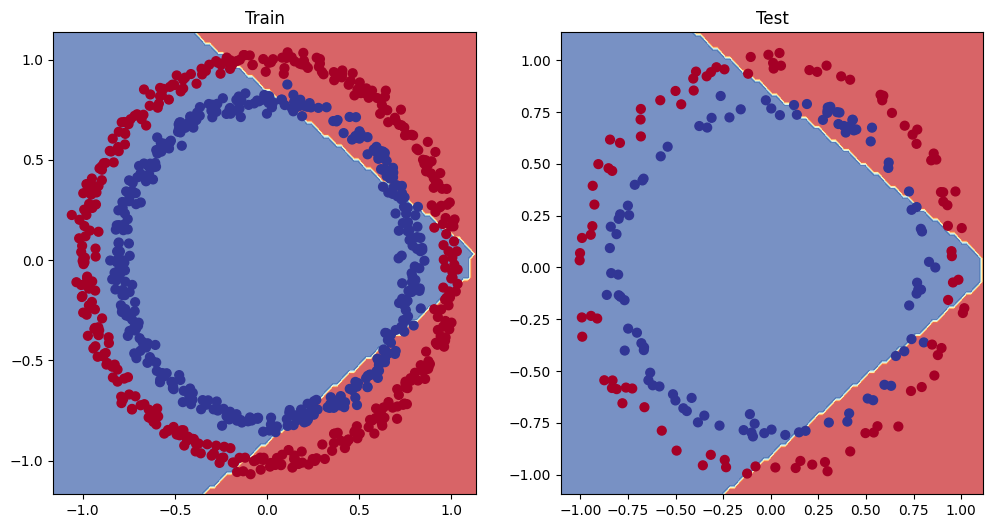

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Nowa sekcja

In [ ]:
# pip install fastcore -U

In [ ]:
# Improving a model (from model perspective -> deal directly with the model)

# Add more layers
# Add more hidden units  
# Fit for longer
# Changing the activation functions
# Change the learning rate
# Change the loss function

In [ ]:
# 11:08:40 
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))  # this way of writing of operations leverage speed ups


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
y_train.size(), y_pred.size()

(torch.Size([800]), torch.Size([800]))

In [ ]:
# # Calculate acurracy
# def accuracy_fn(y_true, y_pred):
#   # if len(y_pred) > 0:
#     correct = torch.eq(y_true, y_pred).sum().item()
#     acc = (correct / len(y_pred)) * 100
#     return acc

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

epoch = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epoch):
  # model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)


    
  # loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
  #                y_train)
  # acc = accuracy_fn(y_true=y_logits,
  #                   y_pred=y_pred)


  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))


    loss = loss_fn(test_logits,
                   y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')


Epoch: 0 | Loss: 0.69261, Acc: 50.88% | Test loss: 0.52811, Test acc: 51.00%
Epoch: 100 | Loss: 0.69379, Acc: 50.38% | Test loss: 0.52811, Test acc: 48.00%
Epoch: 200 | Loss: 0.69437, Acc: 51.12% | Test loss: 0.52811, Test acc: 46.00%
Epoch: 300 | Loss: 0.69458, Acc: 51.62% | Test loss: 0.52811, Test acc: 45.00%
Epoch: 400 | Loss: 0.69465, Acc: 51.12% | Test loss: 0.52811, Test acc: 46.00%
Epoch: 500 | Loss: 0.69467, Acc: 51.00% | Test loss: 0.52811, Test acc: 46.00%
Epoch: 600 | Loss: 0.69468, Acc: 51.00% | Test loss: 0.52811, Test acc: 46.00%
Epoch: 700 | Loss: 0.69468, Acc: 51.00% | Test loss: 0.52811, Test acc: 46.00%
Epoch: 800 | Loss: 0.69468, Acc: 51.00% | Test loss: 0.52811, Test acc: 46.00%
Epoch: 900 | Loss: 0.69468, Acc: 51.00% | Test loss: 0.52811, Test acc: 46.00%


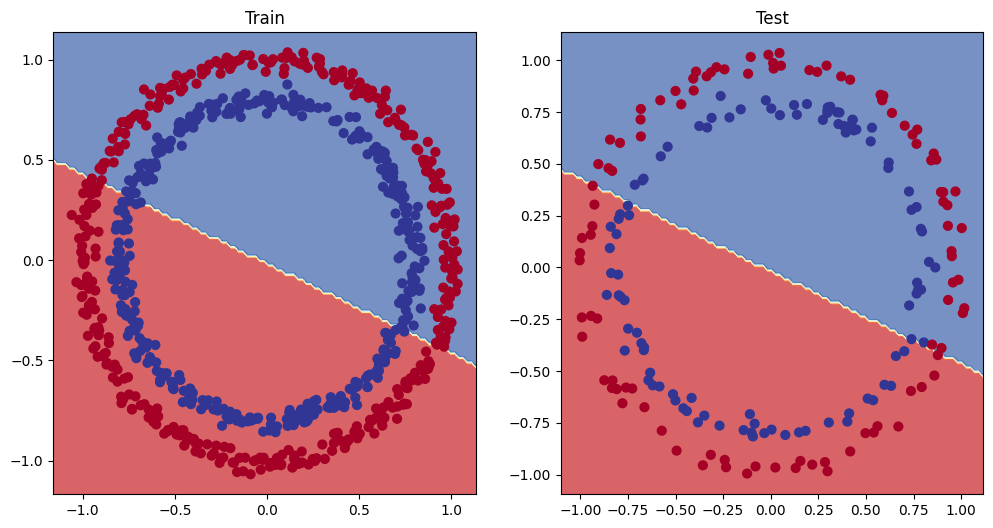

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias  # Linear regression formula

print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# 11:32:10 

In [ ]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)


(80, 20, 80, 20)

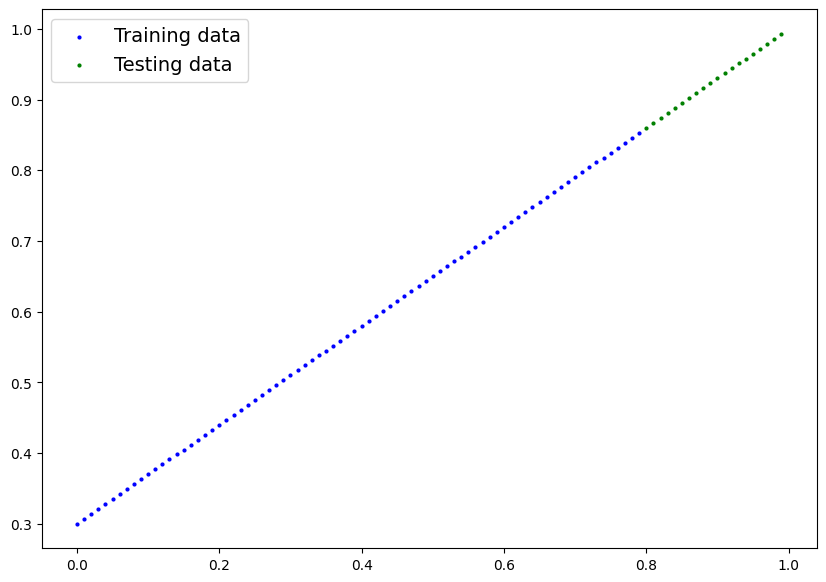

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    y_test = model_2(X_test_regression)
    test_loss = loss_fn(y_test, y_test_regression)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}')

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


In [ ]:
# 11:45:51 

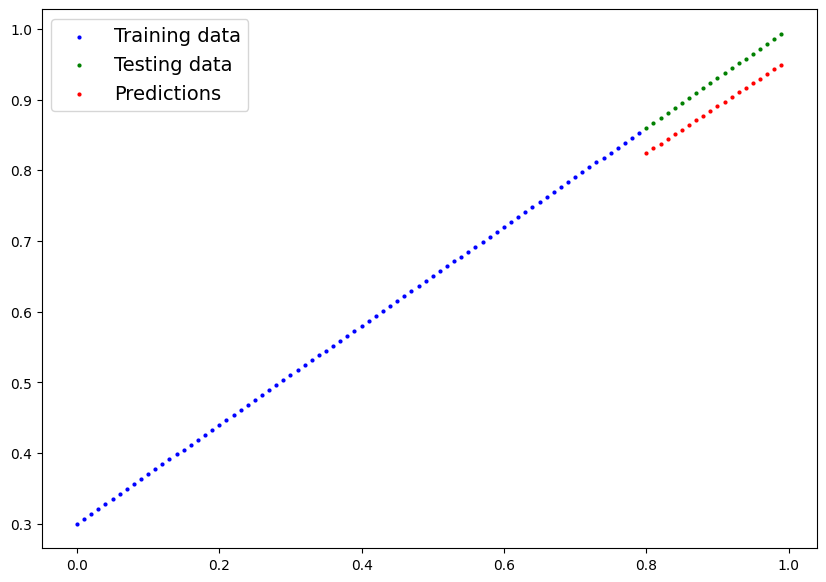

In [ ]:
# turn on evaluation mode
model_2.eval()

#Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)


# Plot data and predictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)


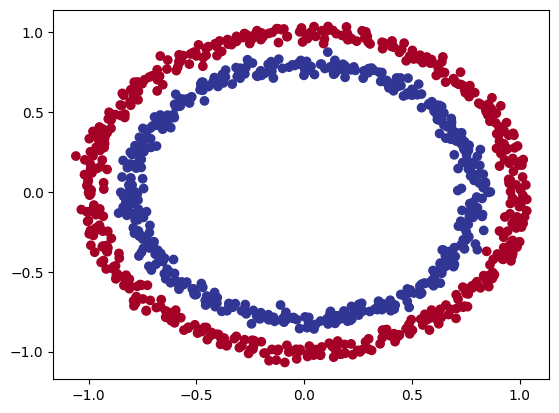

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# Non-linearity
# Convert data to tensors
import torch
from sklearn.model_selection import train_test_split


# Data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
# New non-linear model
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
len(X_test), len(y_test)

(200, 200)

In [ ]:

loss_fn = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                         lr=0.1)

# optimizer = torch.nn.SGD(params=model_3.parameters,
#                          lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                 y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_pred=test_pred, y_true=y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.4}, Acc: {acc:.2f}% |  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

# 

Epoch: 0 | Loss: 0.6929, Acc: 50.00% |  Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% |  Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% |  Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% |  Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% |  Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.681, Acc: 52.75% |  Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% |  Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% |  Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% |  Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% |  Test Loss: 0.6215, Test Acc: 79.00%


In [ ]:
# model_3.state_dict()

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

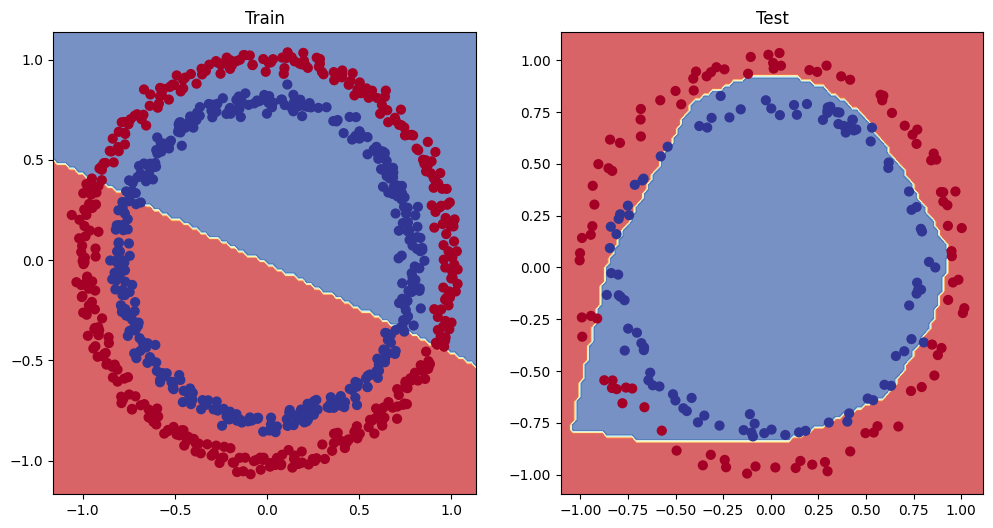

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)



In [ ]:
# 12:32:56
# Replication non-linear activation functions

In [ ]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

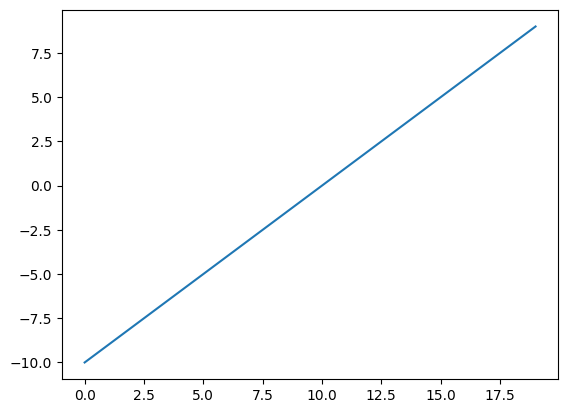

In [ ]:
# Visualise
plt.plot(A);

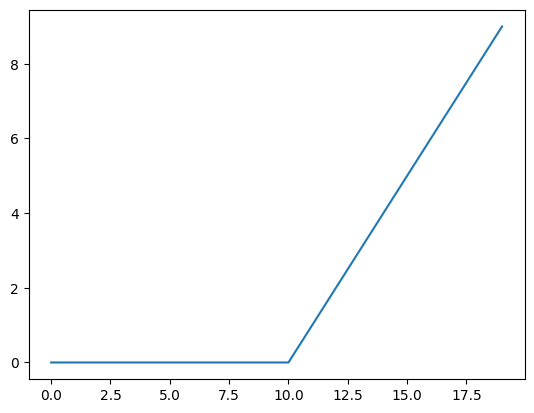

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

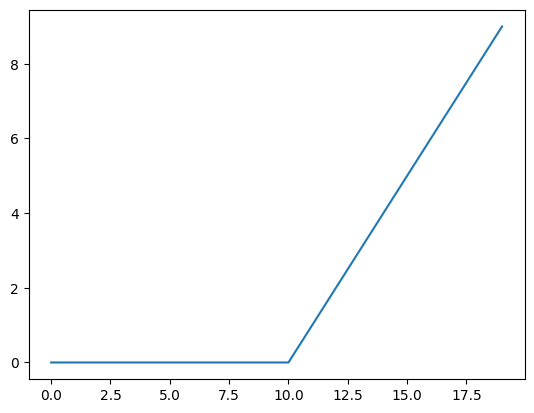

In [ ]:
# Plot ReLU

plt.plot(relu(A));


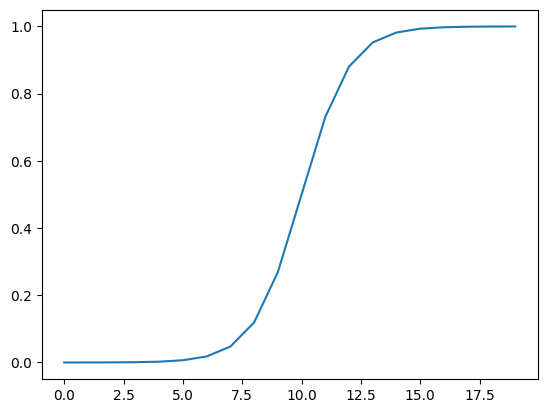

In [ ]:
# same with Sigmoid

def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(A));

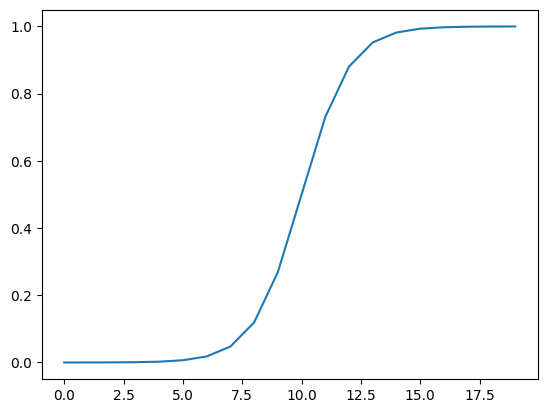

In [ ]:
plt.plot(torch.sigmoid(A));

In [ ]:
## Putting together with multi-class

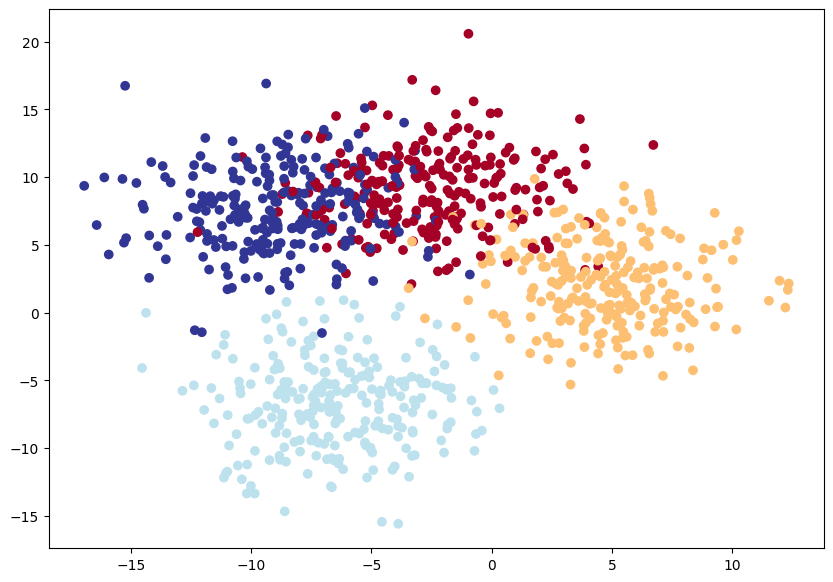

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=3,
                            random_state=RANDOM_SEED,
                            )

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))        
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
y_blob_train[:11]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0])

In [ ]:
# device agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:
    
    Example:"""

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      # nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      # nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_train.shape, y_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 0., 0., 1.]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [ ]:
# Training - raw output (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.4233, -1.1498, -1.7140, -0.4481],
        [ 1.5376, -1.1611,  1.5487,  1.9092],
        [ 2.1548,  0.9075,  2.5277,  0.8407],
        [-0.5120, -0.2720, -0.5827, -0.3864],
        [-1.0917, -1.7494, -1.4350,  0.2665],
        [ 2.2797, -1.4527,  2.3248,  2.7175],
        [ 1.3368,  1.1349,  1.6587,  0.0204],
        [ 0.0570, -1.4742, -0.1288,  0.9705],
        [ 3.5601,  0.7740,  4.0577,  2.0561],
        [-0.3544, -1.5270, -0.5900,  0.6839]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.4233, -1.1498, -1.7140, -0.4481],
        [ 1.5376, -1.1611,  1.5487,  1.9092],
        [ 2.1548,  0.9075,  2.5277,  0.8407],
        [-0.5120, -0.2720, -0.5827, -0.3864],
        [-1.0917, -1.7494, -1.4350,  0.2665]])
tensor([[0.1750, 0.2301, 0.1309, 0.4641],
        [0.2834, 0.0191, 0.2866, 0.4110],
        [0.3325, 0.0955, 0.4827, 0.0893],
        [0.2306, 0.2931, 0.2149, 0.2614],
        [0.1635, 0.0847, 0.1160, 0.6358]])


In [ ]:
# 13:18:32 
# Logits (raw output of the model) -> Pred probs (use "Torch.softmax") -> 
# Pred labels (take the argmax of the pediction probabilities)
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[0.1750, 0.2301, 0.1309, 0.4641],
        [0.2834, 0.0191, 0.2866, 0.4110],
        [0.3325, 0.0955, 0.4827, 0.0893],
        [0.2306, 0.2931, 0.2149, 0.2614],
        [0.1635, 0.0847, 0.1160, 0.6358]])

In [ ]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 2, 2, 3, 1, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
## Training and testing
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.01)


X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs = 100

for epoch in range(epochs):
  model_4.train()
  
  # 13:28:18 ??? (odp. jest '-')
  y_logits = model_4(X_blob_train)

  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_pred_probs, dim=1)

  loss = loss_fn(y_logits, y_blob_train)

  acc = accuracy_fn(y_true=y_blob_train,
                 y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test)
    y_pred_test = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(y_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=y_pred_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 1.0767 | Accuracy: 59.88 | Test loss: 0.9954 | Test acc: 63.00%
Epoch: 10 | Loss: 0.7050 | Accuracy: 78.75 | Test loss: 0.6780 | Test acc: 88.50%
Epoch: 20 | Loss: 0.5696 | Accuracy: 85.62 | Test loss: 0.5518 | Test acc: 90.00%
Epoch: 30 | Loss: 0.4969 | Accuracy: 86.88 | Test loss: 0.4807 | Test acc: 91.50%
Epoch: 40 | Loss: 0.4513 | Accuracy: 87.00 | Test loss: 0.4347 | Test acc: 91.00%
Epoch: 50 | Loss: 0.4201 | Accuracy: 87.25 | Test loss: 0.4025 | Test acc: 90.50%
Epoch: 60 | Loss: 0.3975 | Accuracy: 87.25 | Test loss: 0.3786 | Test acc: 91.00%
Epoch: 70 | Loss: 0.3806 | Accuracy: 86.88 | Test loss: 0.3604 | Test acc: 91.00%
Epoch: 80 | Loss: 0.3676 | Accuracy: 87.00 | Test loss: 0.3461 | Test acc: 91.00%
Epoch: 90 | Loss: 0.3574 | Accuracy: 87.12 | Test loss: 0.3345 | Test acc: 91.00%


In [ ]:
# 13:40:28

## Making and evaluating **predictions**

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]


tensor([[ 0.7848,  2.0446, -6.4772, -2.9398],
        [ 2.7139, -2.9879,  0.5995,  3.7561],
        [-0.1810, -2.3438,  7.6532,  3.4700],
        [-0.0245,  1.2163, -1.9253, -1.5947],
        [ 1.9532,  0.9920, -7.2963, -1.7042],
        [ 3.6570, -4.4852,  1.5953,  5.6687],
        [-1.0711, -0.7701,  6.3023,  1.4380],
        [ 2.2567, -0.7320, -3.7978,  0.6667],
        [ 0.9386, -4.8371, 10.6666,  6.7522],
        [ 2.0752, -0.0772, -4.9275, -0.2196]])

In [ ]:
# Go from logits -> to predictions probabilities
y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred_probs

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 0, 0, 2, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 0, 0, 0,
        0, 3, 1, 3, 0, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 0, 1, 0, 2, 0, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 3, 0, 0, 2, 3, 1, 3, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 0, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 3,
        1, 3, 2, 0, 3, 1, 2, 1])

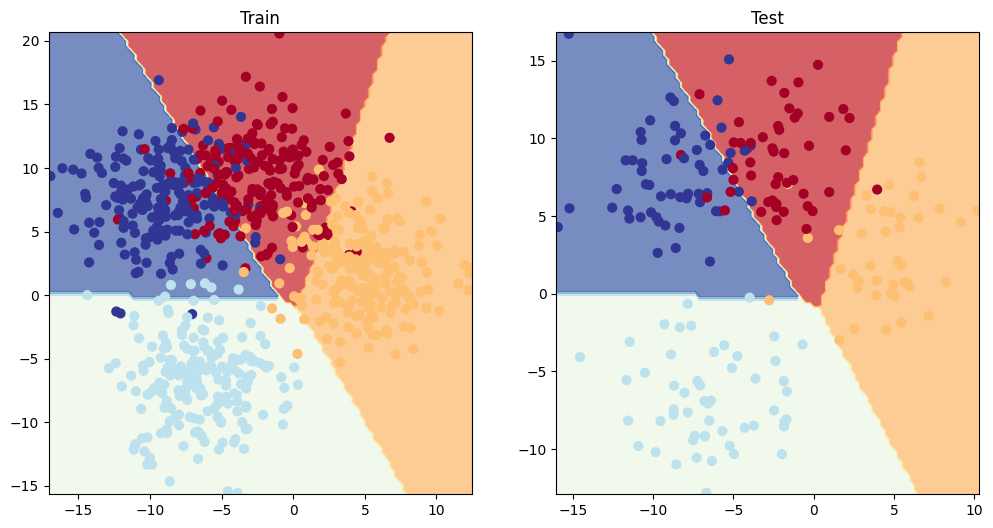

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
# More classification metrics



In [ ]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 15.4 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# setup metric
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4)

# calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)



tensor(0.5950)

In [ ]:
# - When to use precision and recall? -> beyond precision and recall - an article + torchmetrics

In [ ]:
# 13:57:55 

Excercises

In [ ]:
# - Odnajdywanie właściwych danych (na przestrzeni czasu).
# - Klasyfikowanie niewłaściwych zapytań (email) - znaleźć pretrained model
# - Większa samodzielność przy wyborze pojazu/modelu w tym do AC! - Przez API, tak czy inaczej, to i tak będzie kluczowy model!

# - Może inne podejście, przez API..?

# - Większa sprzedaż, jak?
#   - SEO, jak? 
#     - Zrobić Flatpages i Snapshots!
#     - Lepszy performace strony..


In [ ]:
# Import torch
import torch

# Setup device agnostic code
device = 'gpu' if torch.cuda.is_available() else 'cpu'

# Setup random seed
RANDOM_SEED = 42

In [ ]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt

n_samples = 1000

X, y = make_moons(n_samples,
                  noise=0.07,
                  random_state=42)

moons = pd.DataFrame({"X1": X[:, 0],
                     "X2": X[:, 1],
                     "label": y})

In [ ]:
moons

,X1,X2,label
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0
...,...,...,...
995,0.803092,0.554727,0
996,-0.152207,0.936422,0
997,1.671254,-0.324041,1
998,-0.953016,0.302205,0


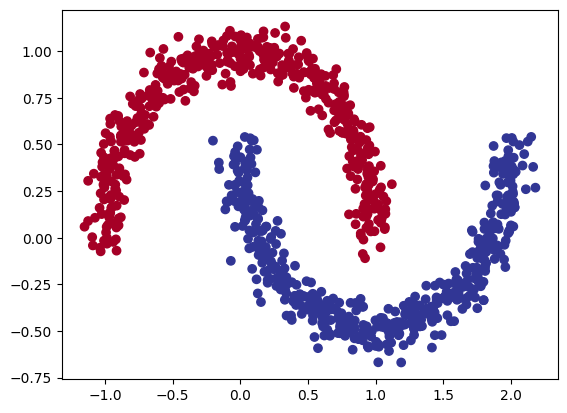

In [ ]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

X[:5], y[:5]

(tensor([[-0.0334,  0.4214],
         [ 0.9988, -0.4429],
         [ 0.8896, -0.3278],
         [ 0.3420, -0.4177],
         [-0.8385,  0.5324]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
import torch
from torch import nn

class MoonModelV1(nn.Module):
  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()

    self.layer1 = nn.Linear(in_features=in_features, 
                              out_features=hidden_units)
    self.layer2 = nn.Linear(in_features=hidden_units, 
                              out_features=hidden_units)
    self.layer3 = nn.Linear(in_features=hidden_units,
                            out_features=out_features)
    self.relu = nn.ReLU()

  def forward(self, x):
      return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


model_5 = MoonModelV1(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_5

MoonModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model_5.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # sigmoid layer built-in
# loss_fn = nn.BCELoss() # requires sigmoid layer

optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)


In [ ]:
X_train[:5]

tensor([[ 2.0144,  0.2466],
        [-1.0187,  0.4045],
        [-0.1252,  1.0580],
        [-0.0977,  0.9901],
        [ 0.3807, -0.2384]])

In [ ]:
# What's coming out of our model?

# logits (raw outputs of model)
print(f"Logits:")
print(model_5(X_train.to(device)[:10]).squeeze())


## Your code here ##
# Prediction probabilities
print(f"Pred probs: ")
print(torch.sigmoid(model_5(X_train.to(device)[:10]).squeeze()))
## Your code here ##


# Prediction labels
y_pred = torch.round(torch.sigmoid(model_5(X_train.to(device)[:10]).squeeze()))
print(f"Pred labels: {y_pred[:5]}")
## Your code here ##

Logits:
tensor([0.0019, 0.0094, 0.0161, 0.0185, 0.0284, 0.0192, 0.0291, 0.0196, 0.0258,
        0.0079], grad_fn=<SqueezeBackward0>)
Pred probs: 
tensor([0.5005, 0.5024, 0.5040, 0.5046, 0.5071, 0.5048, 0.5073, 0.5049, 0.5065,
        0.5020], grad_fn=<SigmoidBackward0>)
Pred labels: tensor([1., 1., 1., 1., 1.], grad_fn=<SliceBackward0>)


In [ ]:
from torchmetrics import Accuracy

acc_fn = Accuracy(task='multiclass', num_classes=2).to(device)
acc_fn

MulticlassAccuracy()

In [ ]:
## TODO: Uncomment this to set the seed
torch.manual_seed(42)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_5.train()
  
  # 1. Forward pass (logits output)
  y_logits = model_5(X_train).squeeze()
  
  # Turn logits into prediction probabilities
  y_pred_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train)  # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  model_5.eval() 
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    y_test_logits = model_5(X_test).squeeze()

    # Turn the test logits into prediction labels
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(y_test_pred, y_test)
    test_acc = acc_fn(y_test_pred, y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.2f} | Acc: {acc:.2f} | Test loss: {test_loss} | Test acc: {test_acc}')
    
     


Epoch: 0 | Loss: 0.70 | Acc: 0.37 | Test loss: 0.8151611089706421 | Test acc: 0.4950000047683716
Epoch: 100 | Loss: 0.39 | Acc: 0.82 | Test loss: 0.6159975528717041 | Test acc: 0.7599999904632568
Epoch: 200 | Loss: 0.24 | Acc: 0.88 | Test loss: 0.5551038980484009 | Test acc: 0.8949999809265137
Epoch: 300 | Loss: 0.20 | Acc: 0.91 | Test loss: 0.5375061631202698 | Test acc: 0.9350000023841858
Epoch: 400 | Loss: 0.17 | Acc: 0.93 | Test loss: 0.5344055891036987 | Test acc: 0.9399999976158142
Epoch: 500 | Loss: 0.12 | Acc: 0.95 | Test loss: 0.5232044458389282 | Test acc: 0.9599999785423279
Epoch: 600 | Loss: 0.08 | Acc: 0.98 | Test loss: 0.511305034160614 | Test acc: 0.9850000143051147
Epoch: 700 | Loss: 0.06 | Acc: 0.99 | Test loss: 0.5051038265228271 | Test acc: 0.9950000047683716
Epoch: 800 | Loss: 0.04 | Acc: 0.99 | Test loss: 0.5051038265228271 | Test acc: 0.9950000047683716
Epoch: 900 | Loss: 0.03 | Acc: 1.00 | Test loss: 0.5032044053077698 | Test acc: 1.0


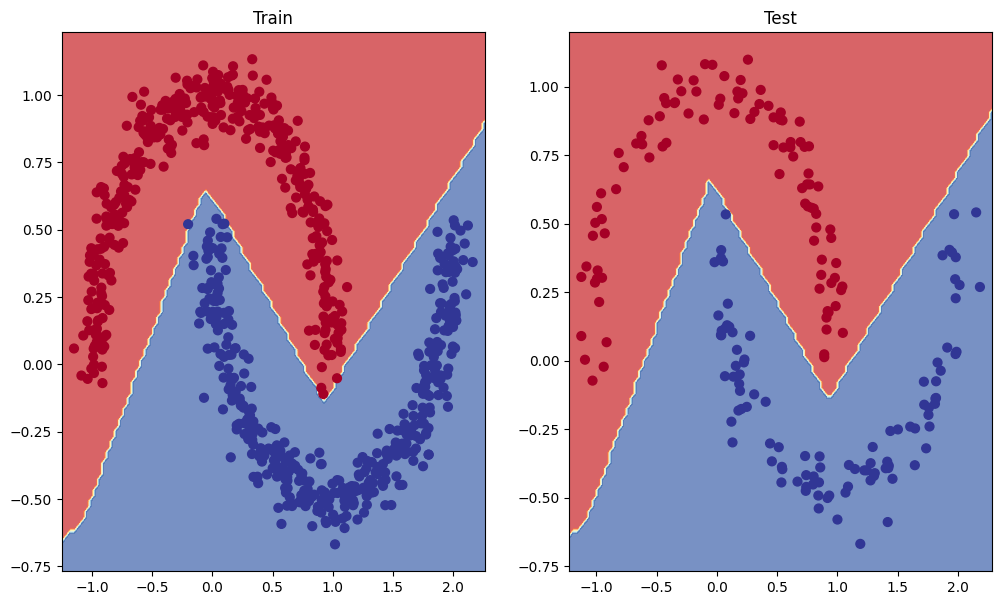

In [ ]:

# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_5, X_test, y_test)

In [ ]:
# Create a straight line tensor

strite_linbe = torch.arange(-100, 100, 1)

In [ ]:
tanh_strite_linbe = torch.tanh(strite_linbe)
tanh_strite_linbe

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
        -0.9993, -0.9951, -0.9640, -0.76

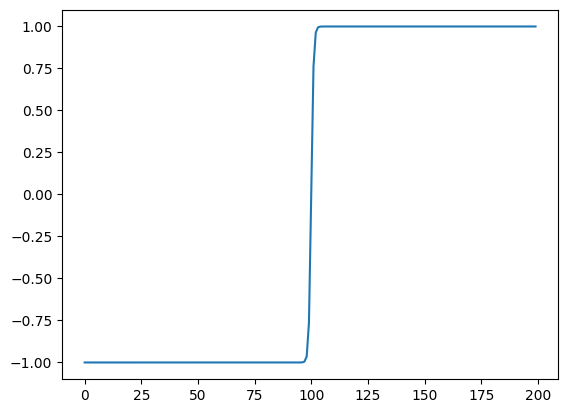

In [ ]:
plt.plot(tanh_strite_linbe);

In [ ]:
import math

def tanh(x):
  return (math.e ** x - math.e ** -x) / (math.e ** x + math.e ** -x)


# def tanh(x):
#   # Source - https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh
#   return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))


tanh_x = tanh(tanh_strite_linbe)

In [ ]:
math.e

2.718281828459045

In [ ]:
torch.e

2.718281828459045

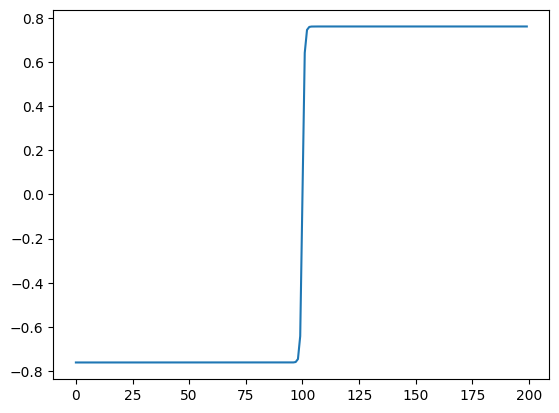

In [ ]:
plt.plot(tanh_x);